## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [1]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [7]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].copy()
y = data.iloc[:, 0].copy()

cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
if cat_cols:
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

In [ ]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [8]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_proba = rf_model.predict_proba(X_test)[:, 1]
rf_pred = (rf_proba > 0.5).astype(int)

rf_auc = roc_auc_score(y_test, rf_proba)
rf_acc = accuracy_score(y_test, rf_pred)
rf_prec = precision_score(y_test, rf_pred)
rf_rec = recall_score(y_test, rf_pred)

print("Random Forest baseline:")
print(f"ROC AUC: {rf_auc:.3f}")
print(f"Accuracy: {rf_acc:.3f}")
print(f"Precision: {rf_prec:.3f}")
print(f"Recall: {rf_rec:.3f}")


gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

gb_proba = gb_model.predict_proba(X_test)[:, 1]
gb_pred = (gb_proba > 0.5).astype(int)

gb_auc = roc_auc_score(y_test, gb_proba)
gb_acc = accuracy_score(y_test, gb_pred)
gb_prec = precision_score(y_test, gb_pred)
gb_rec = recall_score(y_test, gb_pred)

print("\nGradient Boosting baseline:")
print(f"ROC AUC: {gb_auc:.3f}")
print(f"Accuracy: {gb_acc:.3f}")
print(f"Precision: {gb_prec:.3f}")
print(f"Recall: {gb_rec:.3f}")

Random Forest baseline:
ROC AUC: 0.819
Accuracy: 0.815
Precision: 0.820
Recall: 0.943

Gradient Boosting baseline:
ROC AUC: 0.819
Accuracy: 0.790
Precision: 0.827
Recall: 0.886


In [ ]:
mlp_model = MLPClassifier(hidden_layer_sizes=(30,), max_iter=2000, random_state=42)
mlp_model.fit(X_train, y_train)

mlp_proba = mlp_model.predict_proba(X_test)[:, 1]
mlp_pred = (mlp_proba > 0.5).astype(int)

mlp_auc = roc_auc_score(y_test, mlp_proba)
mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_prec = precision_score(y_test, mlp_pred)
mlp_rec = recall_score(y_test, mlp_pred)

print("\nMLP baseline:")
print(f"ROC AUC: {mlp_auc:.3f}")
print(f"Accuracy: {mlp_acc:.3f}")
print(f"Precision: {mlp_prec:.3f}")
print(f"Recall: {mlp_rec:.3f}")


MLP baseline:
ROC AUC: 0.724
Accuracy: 0.695
Precision: 0.776
Recall: 0.793


In [11]:
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200, 400],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
print("Лучшие параметры RF:", rf_grid.best_params_)


gb_params = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [2, 3, 4]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
gb_grid.fit(X_train, y_train)
gb_best = gb_grid.best_estimator_
print("Лучшие параметры GB:", gb_grid.best_params_)


from sklearn.pipeline import Pipeline

mlp_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=2000, random_state=42))
])

mlp_params = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50,50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__alpha': [0.0001, 0.001],
    'mlp__learning_rate_init': [0.001, 0.01]
}

mlp_grid = GridSearchCV(
    mlp_pipe,
    mlp_params,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)
mlp_grid.fit(X_train, y_train)
mlp_best = mlp_grid.best_estimator_
print("Лучшие параметры MLP:", mlp_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры RF: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 400}
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Лучшие параметры GB: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Лучшие параметры MLP: {'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate_init': 0.001}


In [ ]:
models = {
    "RF tuned": rf_best.predict_proba(X_test)[:,1],
    "GB tuned": gb_best.predict_proba(X_test)[:,1],
    "MLP tuned": mlp_best.predict_proba(X_test)[:,1],
}

print("\n=== Итоговые метрики лучших моделей ===")
for name, proba in models.items():
    auc = roc_auc_score(y_test, proba)
    pred = (proba > 0.5).astype(int)
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    print(f"\n{name}:")
    print(f"ROC AUC: {auc:.3f}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")



=== Итоговые метрики лучших моделей ===

RF tuned:
ROC AUC: 0.827
Accuracy: 0.800
Precision: 0.805
Recall: 0.943

GB tuned:
ROC AUC: 0.822
Accuracy: 0.785
Precision: 0.813
Recall: 0.900

MLP tuned:
ROC AUC: 0.757
Accuracy: 0.730
Precision: 0.807
Recall: 0.807


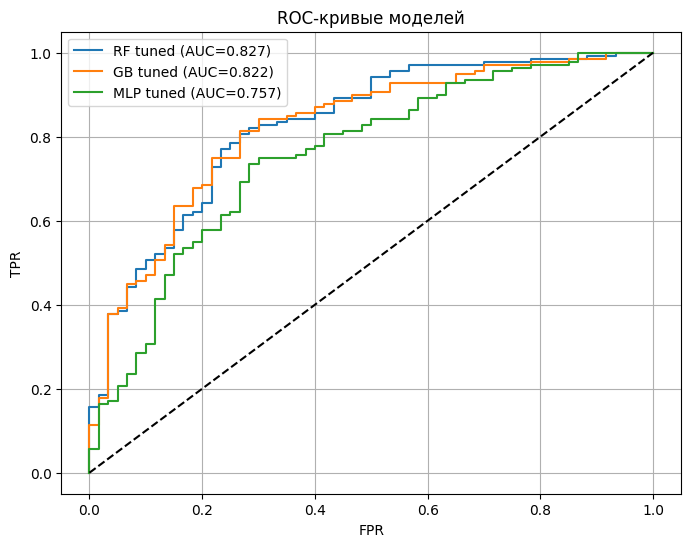

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure(figsize=(8,6))

for name, proba in models.items():
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC-кривые моделей")
plt.legend()
plt.grid()
plt.show()


После подбора параметров лучше всех сработал Random Forest: он показал ROC AUC 0.827 и самые хорошие метрики по остальным показателям. Gradient Boosting немного уступил ему с AUC 0.822. Нейронная сеть дала заметно более слабый результат — ROC AUC всего 0.757. Поэтому для этого датасета ансамблевые методы оказались наиболее эффективными.

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели